In [54]:
import numpy as np
from ar import generate_process, generate_process_heteroskedastic, fit_ar_model, predict
from conformal import naive_conformal, aci, weighted_conformal
from ours import weighted_aci, u_aci
from utils import moving_average, plot_coverage_size, plot_sets, plot_vertical_spread
import matplotlib.pyplot as plt
import seaborn as sns
import pdb
import statsmodels
from tqdm import tqdm

## Problem setup

In [55]:
# Check that beta is valid
T_train = 1000
T_test = 10000
T_burnin = 2000
beta = np.array([0.2,0.1,0.1])
std = 10
theta = np.array([1,])[:,None]
nu = np.array([1,])[:,None]
X = 1*np.sin(np.arange(T_train + T_test)/100)[:,None]+2
Y = generate_process_heteroskedastic(T_train+T_test, beta, std, theta, nu, X)
Y_train, Y_test = Y[:T_train], Y[T_train:]

# Fit and predict
betahat = fit_ar_model(Y_train,3)
Yhat_test = predict(Y_test, betahat)

In [62]:
# Create arguments
args = {"T_train": T_train,
        "T_test": T_test,
        "T_burnin": T_burnin,
        "Y_test": Y_test,
        "Yhat_test": Yhat_test,
        "alpha": 0.1,
        "lr_aci": 0.001,
        "poss_widths": np.array([100,150,300,500,1000,2000,5000]),
        "fixed_weights": np.ones((2000,)),
       }

## Run algorithms

In [63]:
# Run conformal
results = [x(args) for x in [naive_conformal, weighted_conformal, aci, u_aci]]
labels = ['naive', 
          'wUnif', 
          'ACI', 
          'WACI' 
         ]
colors = sns.color_palette("terrain").as_hex()[:len(labels)][::-1]

## Plot size and coverage of each method

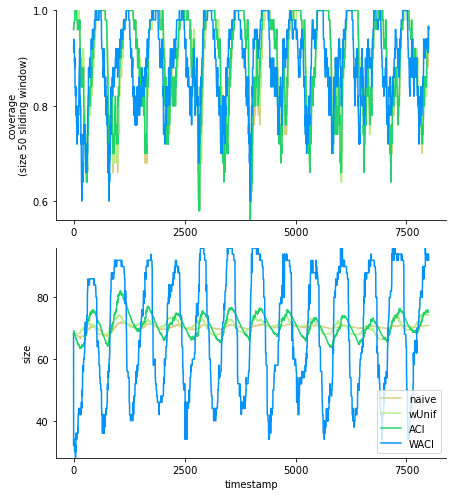

In [64]:
plot_coverage_size(results, labels, colors=colors)

## Plot the nonconformity score as a function of time

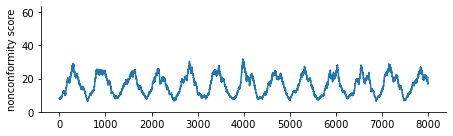

In [65]:
plt.figure(figsize=(6.4,2))
plt.plot(moving_average(np.abs(Yhat_test[T_burnin:]-Y_test[T_burnin:])))
sns.despine(top=True, right=True)
plt.ylabel("nonconformity score")
plt.ylim([0,np.quantile(np.abs(Yhat_test[T_burnin:]-Y_test[T_burnin:]),0.99)])
plt.tight_layout()
plt.show()

## Plot internal parameters of WACI

No changepoint
No changepoint
No changepoint
No changepoint
No changepoint


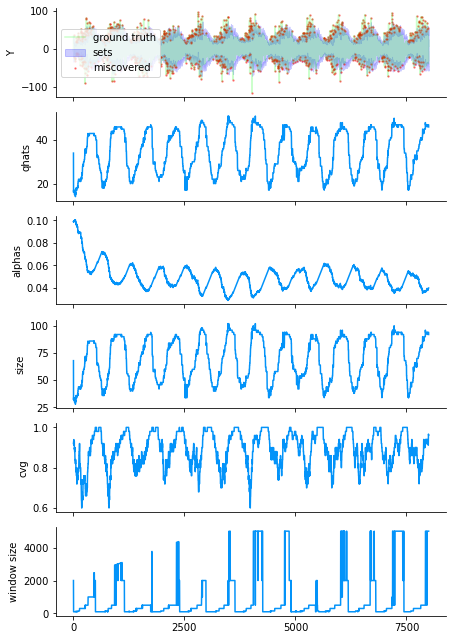

In [66]:
plot_args = {'color': colors[len(labels)-1], 'gt': Y_test[T_burnin:], 'changepoint': None} | results[-1]
plot_vertical_spread(plot_args)

## Plot internal parameters of ACI

No changepoint
No changepoint
No changepoint
No changepoint


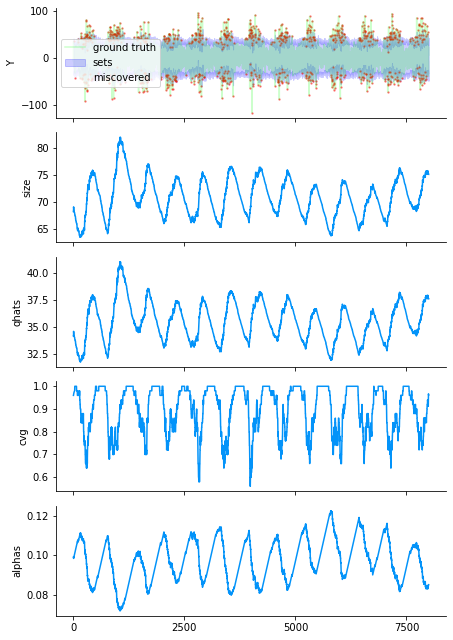

In [67]:
# FOR ACI
plot_args = {'color': colors[len(labels)-1], 'gt': Y_test[T_burnin:], 'changepoint': None} | results[-2]
plot_vertical_spread(plot_args)

Complete